In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [41]:
df=pd.read_csv("processed.cleveland.csv")
df.head()

,age,sex,chest pain type,restingbps,cholestrol,fasting blood sugar,restecg,maximum heart rate,exercise induced angina,exercise ST depression,ST peak slope,# of vessels colored by flourosopy,thal,heart disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [42]:
df = df[~df.isin(['?'])]
df = df.dropna(axis=0)

In [43]:
column_cont = ['age', 'chest pain type', 'restingbps', 'cholestrol', 'restecg', 'maximum heart rate', 'exercise ST depression', 'ST peak slope', '# of vessels colored by flourosopy', 'thal']
df[column_cont] = df[column_cont].astype(float)
df[column_cont] = df[column_cont].apply(lambda x: x/x.max())
df.head()

,age,sex,chest pain type,restingbps,cholestrol,fasting blood sugar,restecg,maximum heart rate,exercise induced angina,exercise ST depression,ST peak slope,# of vessels colored by flourosopy,thal,heart disease
0,0.818182,1.0,0.25,0.725,0.413121,1.0,1.0,0.742574,0.0,0.370968,1.000000,0.000000,0.857143,0
1,0.870130,1.0,1.00,0.800,0.507092,0.0,1.0,0.534653,1.0,0.241935,0.666667,1.000000,0.428571,2
2,0.870130,1.0,1.00,0.600,0.406028,0.0,1.0,0.638614,1.0,0.419355,0.666667,0.666667,1.000000,1
3,0.480519,1.0,0.75,0.650,0.443262,0.0,0.0,0.925743,0.0,0.564516,1.000000,0.000000,0.428571,0
4,0.532468,0.0,0.50,0.650,0.361702,0.0,1.0,0.851485,0.0,0.225806,0.333333,0.000000,0.428571,0


In [44]:
y = df.pop('heart disease')
#df.pop('# of vessels colored by flourosopy')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=100)
y_train[y_train > 0] = 1
y_test[y_test > 0] = 1
y_train.head()

265    1
267    1
15     0
252    0
291    0
Name: heart disease, dtype: int64

In [45]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                224       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Sid Kasi\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [46]:
history=binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)

Epoch 1/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.6142 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.6367 - val_loss: 0.6871 - val_accuracy: 0.7667
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.6854 - val_loss: 0.6819 - val_accuracy: 0.7667
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6929 - val_loss: 0.6736 - val_accuracy: 0.8000
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.7266 - val_loss: 0.6654 - val_accuracy: 0.7667
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.7678 - val_loss: 0.6460 - val_accuracy: 0.8000
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.7603 - val_loss: 0.6274 - val_accuracy: 0.8000
Epoch 8/50
27/27 [==

In [53]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Cleveland nerual network with fluroscopy')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Cleveland nerual network with fluroscopy
0.9
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.85      0.92      0.88        12

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [54]:
binary_model.predict(X_test.iloc[10:11])

array([[0.8443482]], dtype=float32)

Results for Cleveland nerual network with fluroscopy


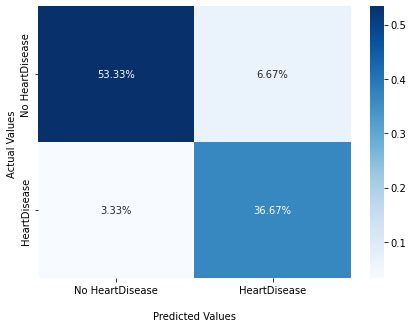

In [56]:
cm = confusion_matrix(y_test, binary_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

print('Results for Cleveland nerual network with fluroscopy')
plt.show()